# Pre-Processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, snowball
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from nltk.util import ngrams

nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\capta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_parquet('./Data/draft_reports.parquet')

In [3]:
df

,player,report,year,pos_x,weight,height,pos_rk,ovr_rk,grade,pos_y,age,Round,Pick
0,Alex Smith,Nephew of Michigan State head coach John L. Sm...,2005.0,QB,217.0,76.125,2.0,3.0,98.0,QB,21,1,1
2,Ronnie Brown,Brown has played second fiddle to Carnell Will...,2005.0,RB,233.0,72.250,1.0,4.0,98.0,RB,23,1,2
3,Braylon Edwards,"Edwards' father, Stanley, played at Michigan a...",2005.0,WR,211.0,74.875,1.0,1.0,99.0,WR,22,1,3
4,Cedric Benson,Benson was drafted by the Los Angeles Dodgers ...,2005.0,RB,222.0,70.500,3.0,10.0,96.0,RB,22,1,4
5,Carnell Williams,Williams started two games and played in nine ...,2005.0,RB,217.0,70.875,2.0,6.0,97.0,None,None,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,Jeff Gunter,Gunter is a versatile edge defender who lines ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OLB,23,7,252
5741,Trenton Gill,Gill has a strong leg. He led the ACC in punt ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,P,23,7,255
5742,Jesse Luketa,Luketa is a relentless run-defender who has go...,2022.0,None,NaN,NaN,NaN,NaN,NaN,LB,23,7,256
5743,Marquis Hayes,Hayes is a mauler who plays with good leverage...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OL,23,7,257


In [4]:
df.Round.value_counts()

6    656
4    654
3    639
5    619
2    573
1    565
7    503
Name: Round, dtype: Int64

In [5]:
df['target'] = None

In [6]:
df.target[df.Round == 1] = 3 

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\3762994471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[df.Round == 1] = 3


In [7]:
df.target[(df.Round == 2) | (df.Round == 3)] = 2 

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\77934495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[(df.Round == 2) | (df.Round == 3)] = 2


In [8]:
df.target[(df.Round == 4) | (df.Round == 5)] = 1 

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\1820849208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[(df.Round == 4) | (df.Round == 5)] = 1


In [9]:
df.target[(df.Round >= 6)] = 0 

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\2767481610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[(df.Round >= 6)] = 0


In [10]:
df.target = df.target.astype('Int64')

In [11]:
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stop_words_list = stopwords.words('english')
stemmer = snowball.EnglishStemmer()

In [12]:
def clean (text, tokenizer, stop_words_list,stemmer):
    lower_text = text.lower()
    token_text = tokenizer.tokenize(lower_text)
    stop_text = [word for word in token_text if word not in stop_words_list]
    stem_text = [stemmer.stem(word) for word in stop_text]
    return stem_text
    

In [13]:
report = df.report

In [14]:
text_data = report.apply(lambda x: clean(x,tokenizer, stop_words_list,stemmer))

In [15]:
df['processed_report'] = text_data

In [16]:
df.age[df.age == ''] = np.nan

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\1734900853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[df.age == ''] = np.nan


In [17]:
df['age'] = df.age.astype('float')

In [18]:
df.age.isna().sum()

312

In [19]:
df['reportlen'] = df.processed_report.apply(len)

In [20]:
df.joined_processed_report = df.processed_report.str.join(" ")

In [21]:
df['joined_report'] = df.processed_report.str.join(" ")

In [22]:
combine = pd.read_parquet('./Data/combine.parquet')

In [23]:
combine['Round'] = combine.Round.astype('Int64')
combine['pick'] = combine.pick.astype('Int64')

In [24]:
combine.drop(['school_name','team'],axis=1,inplace=True)

In [25]:
df['pos'] = df.pos_y

In [26]:
df.pos[(df.pos.isna())] = df.loc[(df.pos.isna())].pos_x

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\2703911430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pos[(df.pos.isna())] = df.loc[(df.pos.isna())].pos_x


In [27]:
df.pos[df.pos == 'OLB'] = 'LB'
df.pos[df.pos == 'ILB'] = 'LB'
df.pos[df.pos == 'G'] = 'OL'
df.pos[df.pos == 'T'] = 'OL'
df.pos[df.pos == 'C'] = 'OL'

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\153570684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pos[df.pos == 'OLB'] = 'LB'
C:\Users\capta\AppData\Local\Temp\ipykernel_23368\153570684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pos[df.pos == 'ILB'] = 'LB'
C:\Users\capta\AppData\Local\Temp\ipykernel_23368\153570684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pos[df.pos == 'G'] = 'OL'
C:\Users\cap

In [28]:
df.drop(['pos_x','pos_y'],axis=1,inplace=True)

In [29]:
merged = df.merge(combine,how='left',left_on=['player','year','Round'],right_on=['player','year','Round'])

In [30]:
merged[merged.player.duplicated()].sort_values(by='player')

,player,report,year,weight_x,height_x,pos_rk,ovr_rk,grade,age,Round,...,sacks_career,pass_defended_career,fumbles_forced_season,fumbles_forced_career,pick,college_conference,Age,speed,shuttle_agility,cone_agility
1777,Aaron Brown,: Brown has adequate size and athleticism to h...,2012.0,220.0,72.000,63.0,NaN,30.0,NaN,7,...,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
67,Alex Smith,"Smith redshirted in 2000, played as a backup i...",2005.0,258.0,76.125,2.0,60.0,83.0,23.0,3,...,NaN,NaN,NaN,NaN,71,None,23.0,90.985129,NaN,NaN
2221,Andrew Jackson,Jackson is a thumper on the interior who has a...,2014.0,254.0,72.875,5.0,187.0,49.0,22.0,6,...,6.5,2.0,NaN,5.0,203,None,22.0,88.120995,NaN,NaN
1126,Anthony Davis,: Davis is another talented offensive tackle p...,2010.0,323.0,77.000,4.0,14.0,93.0,20.0,1,...,NaN,NaN,NaN,NaN,11,None,20.0,78.266040,105.878301,118.458533
2530,Artie Burns,Burns is three year starter who had a career y...,2016.0,193.0,71.875,5.0,31.0,88.0,21.0,1,...,2.0,14.0,NaN,1.0,25,Atlantic Coast Conference,21.0,97.554626,NaN,NaN
3037,Braden Smith,Smith is a three-year starter at right guard w...,2018.0,315.0,78.250,6.0,57.0,82.0,22.0,2,...,NaN,NaN,NaN,NaN,37,Mid-America Intercollegiate Athletic Association,22.0,84.851307,121.693402,NaN
3563,Brandon Jones,"Jones, three-year starter and a team captain i...",2020.0,198.0,71.125,8.0,111.0,68.0,22.0,3,...,1.0,7.0,1.0,2.0,70,Big Twelve Conference,22.0,NaN,NaN,NaN
1712,Brandon Marshall,: \r\nMarshal has active hands and he plays ha...,2012.0,242.0,73.375,20.0,215.0,42.0,22.0,5,...,6.0,13.0,1.0,3.0,142,Western Athletic Conference,22.0,97.516334,172.962570,138.126819
995,Brandon Williams,Williams was a defensive end in college and po...,2009.0,261.0,74.500,11.0,83.0,72.0,21.0,4,...,22.0,5.0,4.0,7.0,120,None,21.0,99.990541,128.435517,138.119695
1899,Brandon Williams,: Williams is a massive interior defensive tac...,2013.0,335.0,73.250,8.0,65.0,79.0,24.0,3,...,NaN,NaN,NaN,NaN,94,Mid-America Intercollegiate Athletic Association,24.0,80.570797,115.278637,126.540410


In [31]:
merged[merged.player == 'Derrick Johnson']

,player,report,year,weight_x,height_x,pos_rk,ovr_rk,grade,age,Round,...,sacks_career,pass_defended_career,fumbles_forced_season,fumbles_forced_career,pick,college_conference,Age,speed,shuttle_agility,cone_agility
188,Derrick Johnson,Johnson played every game as a true freshman i...,2005.0,242.0,75.25,1.0,8.0,96.0,22.0,1,...,NaN,NaN,NaN,NaN,15,Big Twelve Conference,22.0,102.301339,139.431466,107.789907
189,Derrick Johnson,Johnson played every game as a true freshman i...,2005.0,242.0,75.25,1.0,8.0,96.0,22.0,1,...,NaN,NaN,NaN,NaN,15,Big Twelve Conference,22.0,115.955572,215.775187,129.672497


In [32]:
merged.drop(index=[2529,3037,506,3068,1607,3002,2506,3072,3000,188],inplace=True)

In [33]:
merged['pos'] = merged.pos_x

In [34]:
merged.pos[merged.pos == 'OT'] = 'OL'
merged.pos[merged.pos == 'OG'] = 'OL'

C:\Users\capta\AppData\Local\Temp\ipykernel_23368\659348663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.pos[merged.pos == 'OT'] = 'OL'
C:\Users\capta\AppData\Local\Temp\ipykernel_23368\659348663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.pos[merged.pos == 'OG'] = 'OL'


In [35]:
merged.drop(['pos_x','pos_y','Age','pick'],axis=1,inplace=True)

In [36]:
merged.Pick.isna().sum()

0

In [37]:
merged.pos.value_counts()

OL    705
WR    530
LB    530
DB    477
DE    364
RB    362
DT    330
TE    235
CB    225
QB    196
S     143
P      31
K      28
DL     25
FB     21
LS      7
Name: pos, dtype: int64

In [38]:
merged

,player,report,year,weight_x,height_x,pos_rk,ovr_rk,grade,age,Round,...,tackles_loss_career,sacks_career,pass_defended_career,fumbles_forced_season,fumbles_forced_career,college_conference,speed,shuttle_agility,cone_agility,pos
0,Alex Smith,Nephew of Michigan State head coach John L. Sm...,2005.0,217.0,76.125,2.0,3.0,98.0,21.0,1,...,NaN,NaN,NaN,NaN,NaN,Mountain West Conference,88.187311,176.485482,136.815911,QB
1,Ronnie Brown,Brown has played second fiddle to Carnell Will...,2005.0,233.0,72.250,1.0,4.0,98.0,23.0,1,...,NaN,NaN,NaN,NaN,NaN,None,120.996000,168.168738,130.199966,RB
2,Braylon Edwards,"Edwards' father, Stanley, played at Michigan a...",2005.0,211.0,74.875,1.0,1.0,99.0,22.0,1,...,NaN,NaN,NaN,NaN,NaN,None,107.614900,NaN,NaN,WR
3,Cedric Benson,Benson was drafted by the Los Angeles Dodgers ...,2005.0,222.0,70.500,3.0,10.0,96.0,22.0,1,...,NaN,NaN,NaN,NaN,NaN,None,97.457455,NaN,NaN,RB
4,Carnell Williams,Williams started two games and played in nine ...,2005.0,217.0,70.875,2.0,6.0,97.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,Jeff Gunter,Gunter is a versatile edge defender who lines ...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,...,38.5,17.0,4.0,2.0,9.0,Sun Belt Conference,105.744617,144.109521,137.671457,LB
4215,Trenton Gill,Gill has a strong leg. He led the ACC in punt ...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,...,NaN,NaN,NaN,NaN,NaN,Atlantic Coast Conference,NaN,NaN,NaN,P
4216,Jesse Luketa,Luketa is a relentless run-defender who has go...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,...,11.5,0.5,6.0,NaN,NaN,Big Ten Conference,88.494256,NaN,NaN,LB
4217,Marquis Hayes,Hayes is a mauler who plays with good leverage...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,...,NaN,NaN,NaN,NaN,NaN,Big Twelve Conference,80.603451,NaN,NaN,OL


In [39]:
merged.to_parquet('./Data/processed_reports.parquet')

In [40]:
round1 = list(FreqDist(df.processed_report[df.Round == 1].explode()).most_common(25))

In [41]:
round2 = list(FreqDist(df.processed_report[df.Round == 2].explode()).most_common(25))

In [42]:
round3 = list(FreqDist(df.processed_report[df.Round == 3].explode()).most_common(25))

In [43]:
round4 = list(FreqDist(df.processed_report[df.Round == 4].explode()).most_common(25))

In [44]:
round5 = list(FreqDist(df.processed_report[df.Round == 5].explode()).most_common(25))

In [45]:
round6 = list(FreqDist(df.processed_report[df.Round == 6].explode()).most_common(25))

In [46]:
round7 = list(FreqDist(df.processed_report[df.Round == 7].explode()).most_common(25))

In [47]:
all_rounds = list(FreqDist(df.processed_report.explode()).most_common(25))

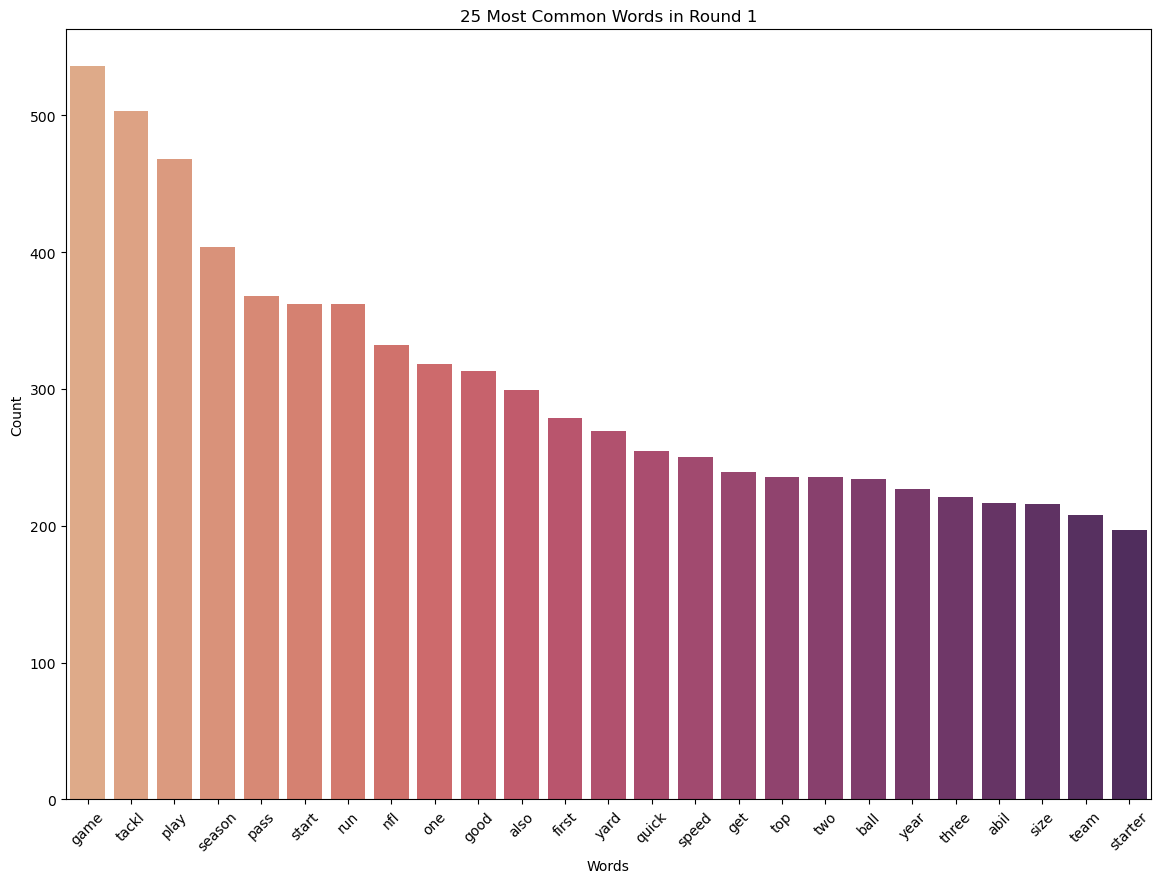

In [48]:
fig, ax = plt.subplots(figsize = (14,10))
labels = [i[0] for i in round1]
values = [i[1] for i in round1]
sns.barplot(x=labels,y=values,palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Common Words in Round 1');

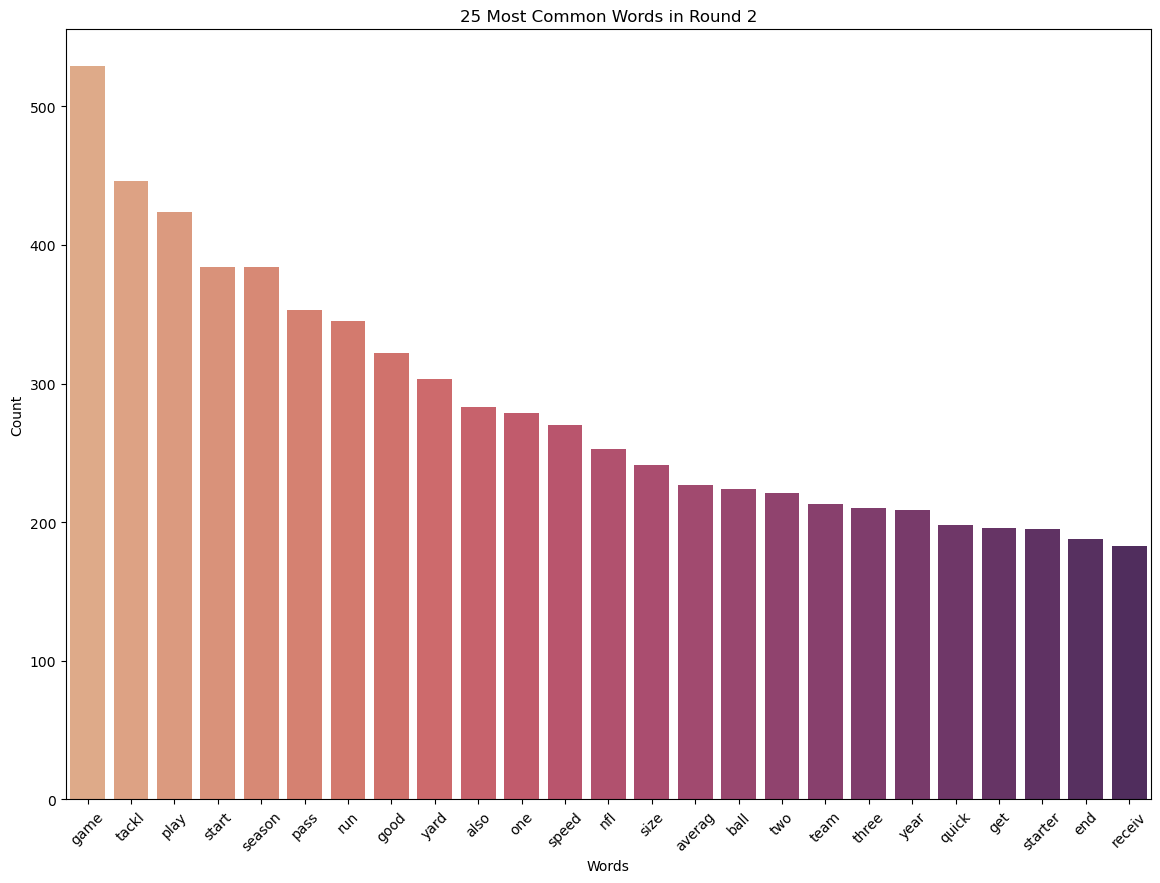

In [49]:
fig, ax = plt.subplots(figsize = (14,10))
labels = [i[0] for i in round2]
values = [i[1] for i in round2]
sns.barplot(x=labels,y=values,palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Common Words in Round 2');

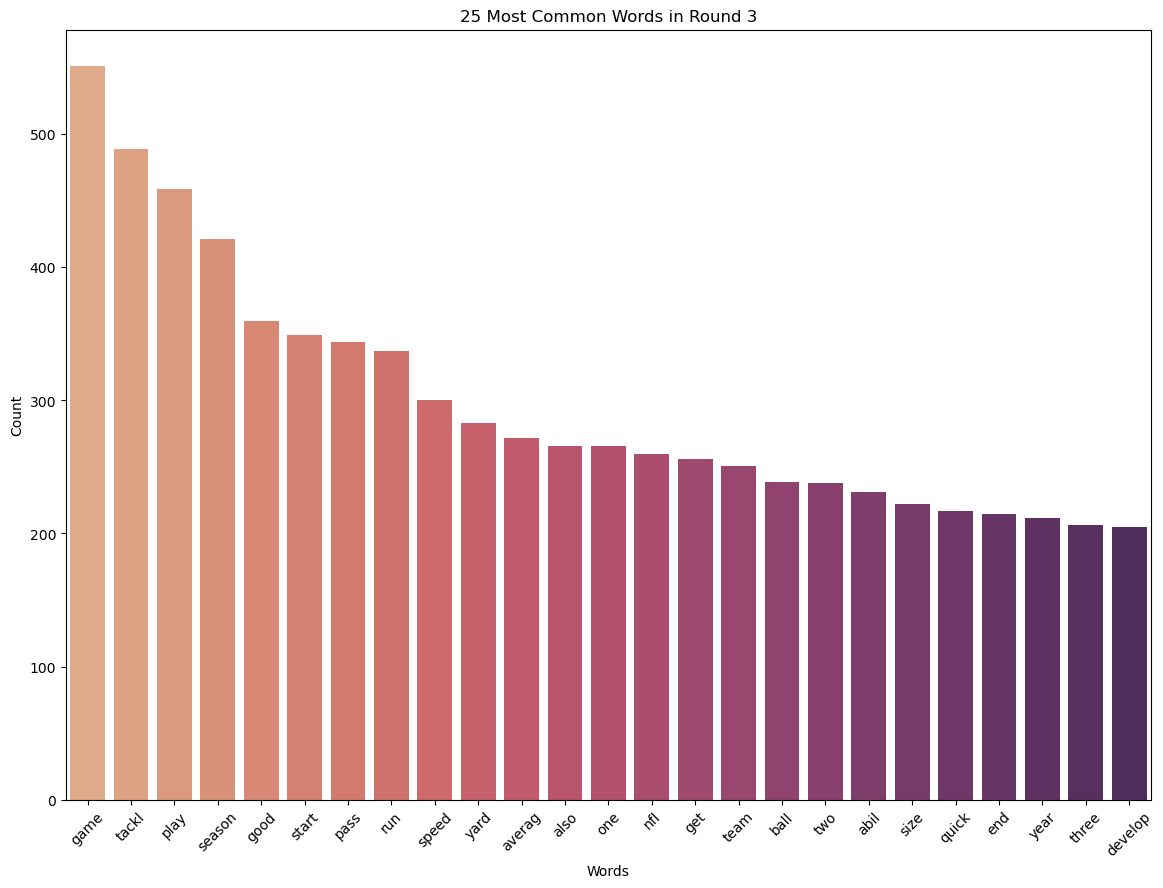

In [50]:
fig, ax = plt.subplots(figsize = (14,10))
labels = [i[0] for i in round3]
values = [i[1] for i in round3]
sns.barplot(x=labels,y=values,palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Common Words in Round 3');

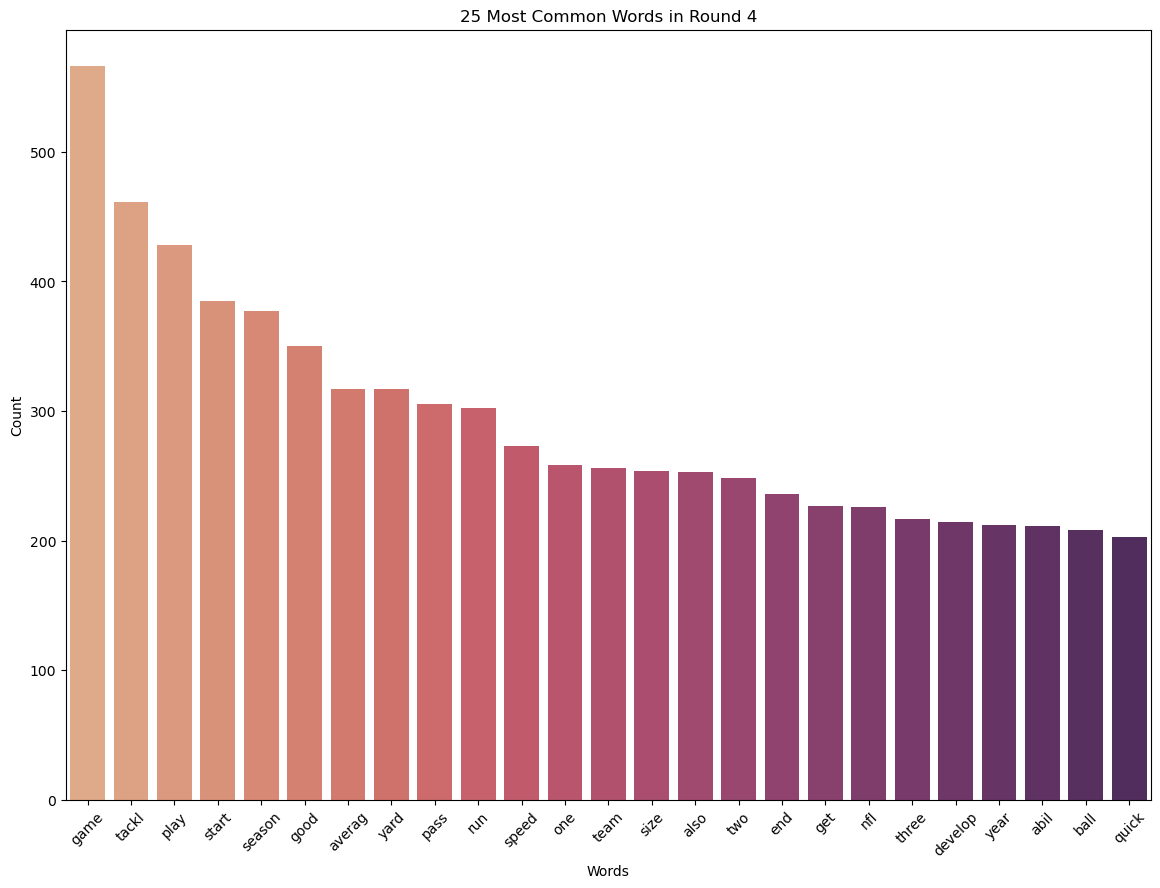

In [51]:
fig, ax = plt.subplots(figsize = (14,10))
labels = [i[0] for i in round4]
values = [i[1] for i in round4]
sns.barplot(x=labels,y=values,palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Common Words in Round 4');

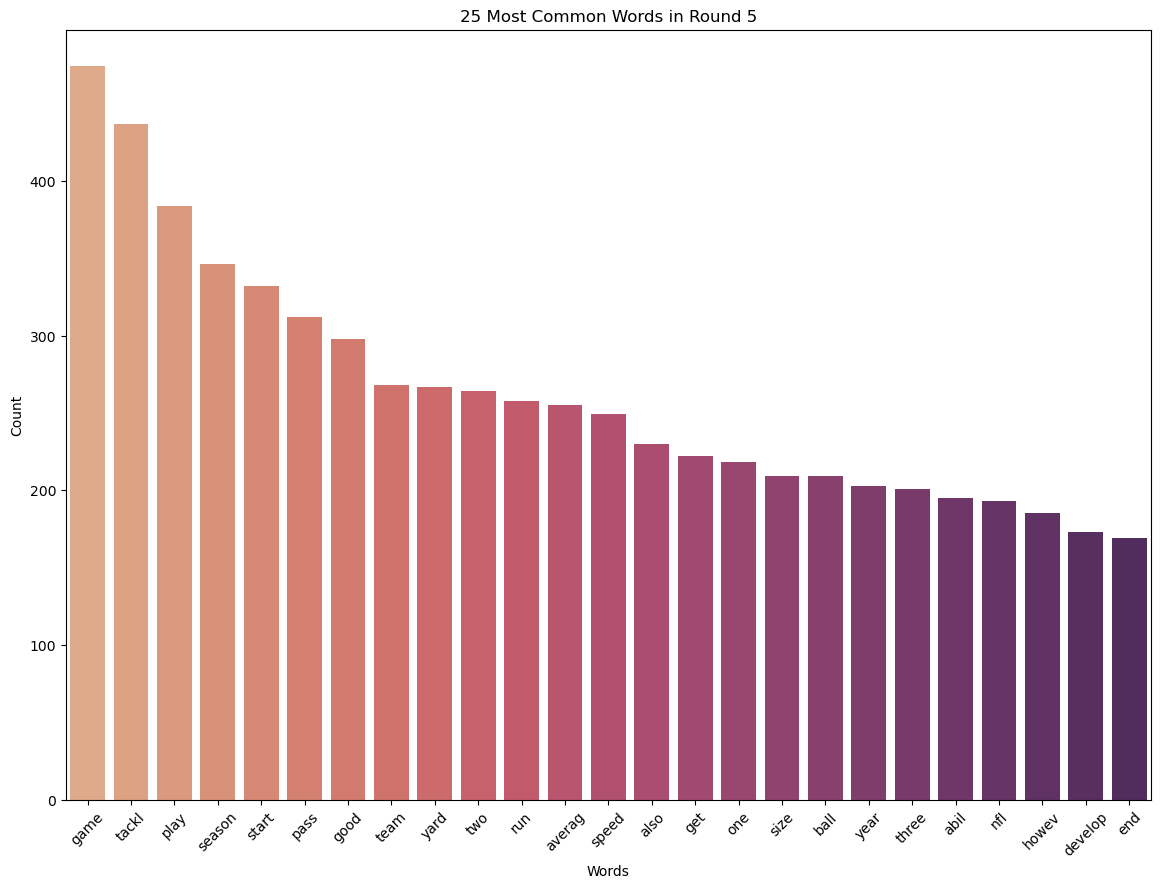

In [52]:
fig, ax = plt.subplots(figsize = (14,10))
labels = [i[0] for i in round5]
values = [i[1] for i in round5]
sns.barplot(x=labels,y=values,palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Common Words in Round 5');

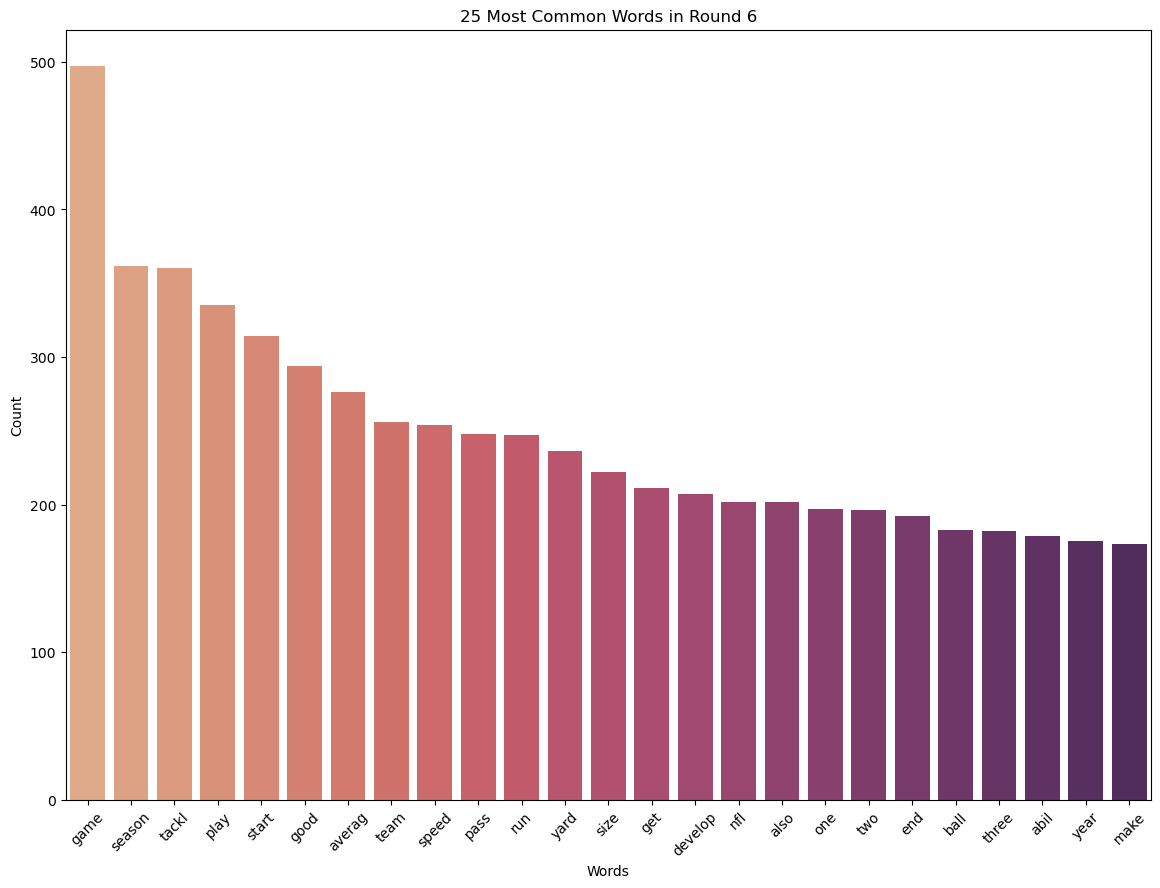

In [53]:
fig, ax = plt.subplots(figsize = (14,10))
labels = [i[0] for i in round6]
values = [i[1] for i in round6]
sns.barplot(x=labels,y=values,palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Common Words in Round 6');

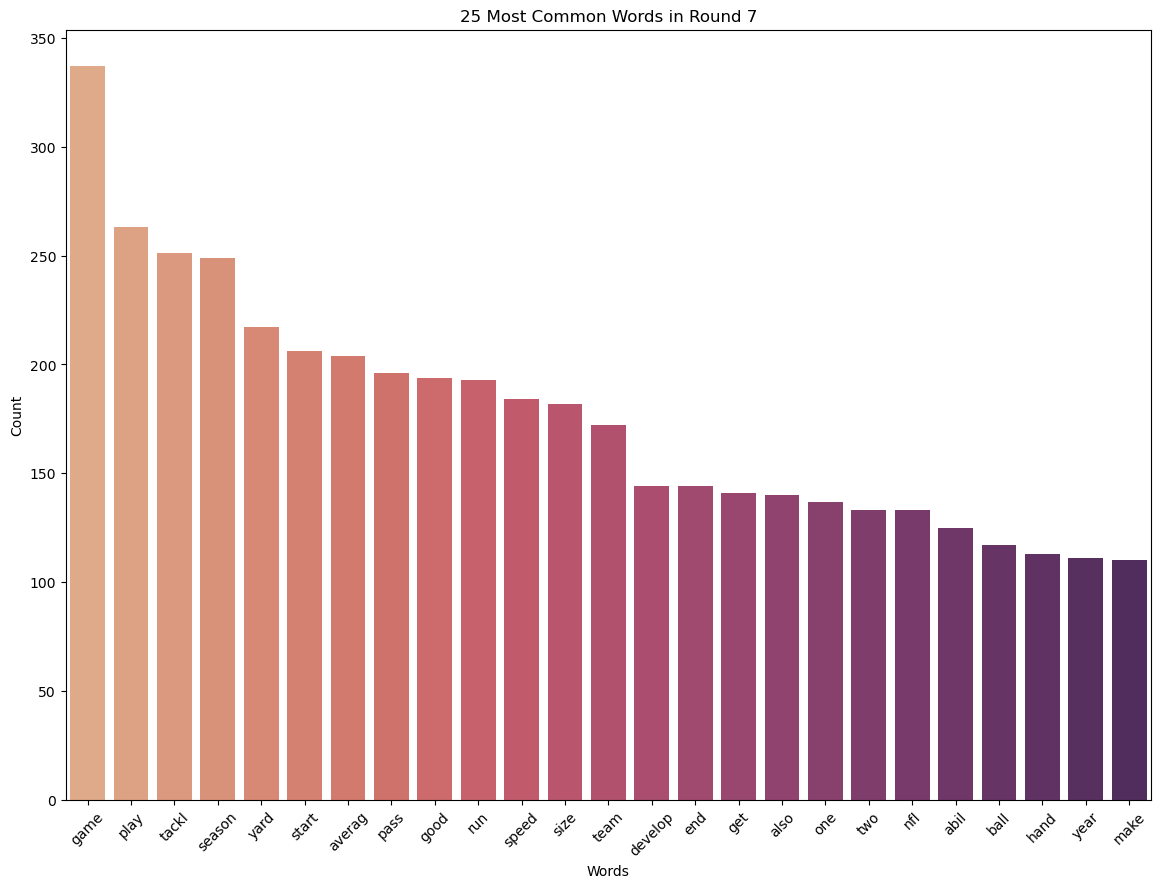

In [54]:
fig, ax = plt.subplots(figsize = (14,10))
labels = [i[0] for i in round7]
values = [i[1] for i in round7]
sns.barplot(x=labels,y=values,palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Common Words in Round 7');

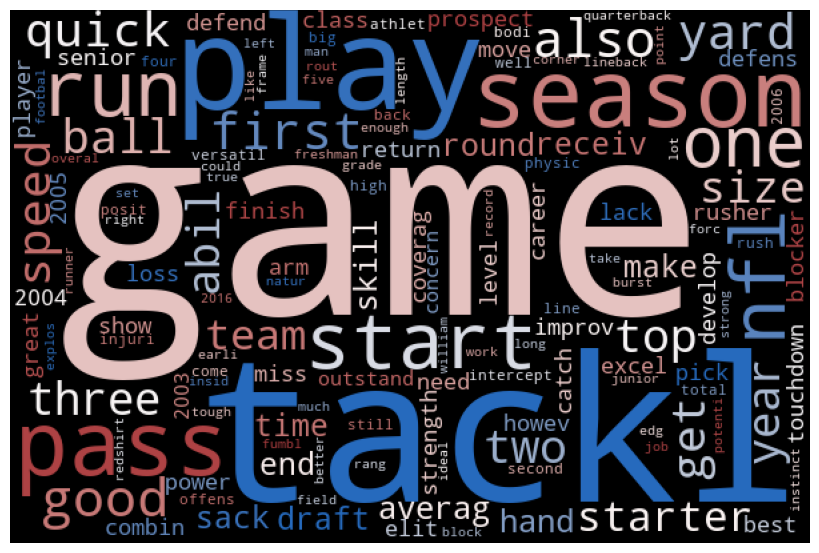

In [55]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(FreqDist(df.processed_report[df.Round == 1].explode()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

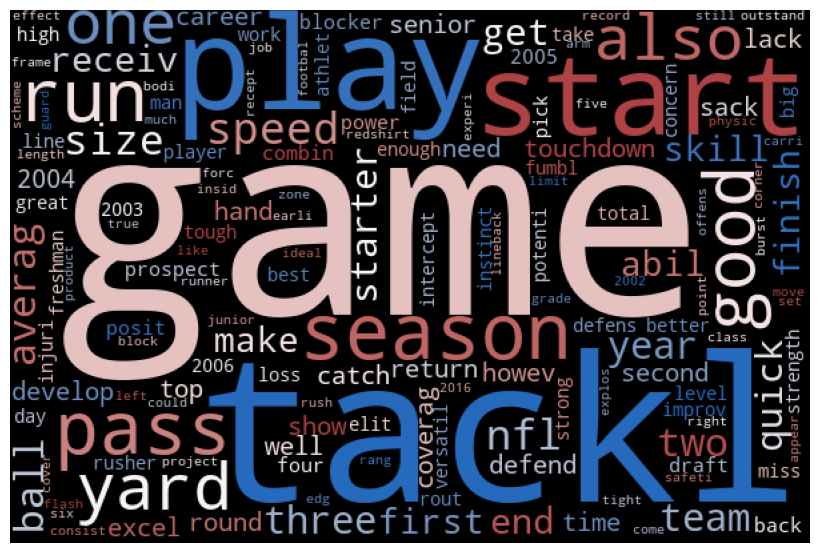

In [56]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(FreqDist(df.processed_report[df.Round == 2].explode()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

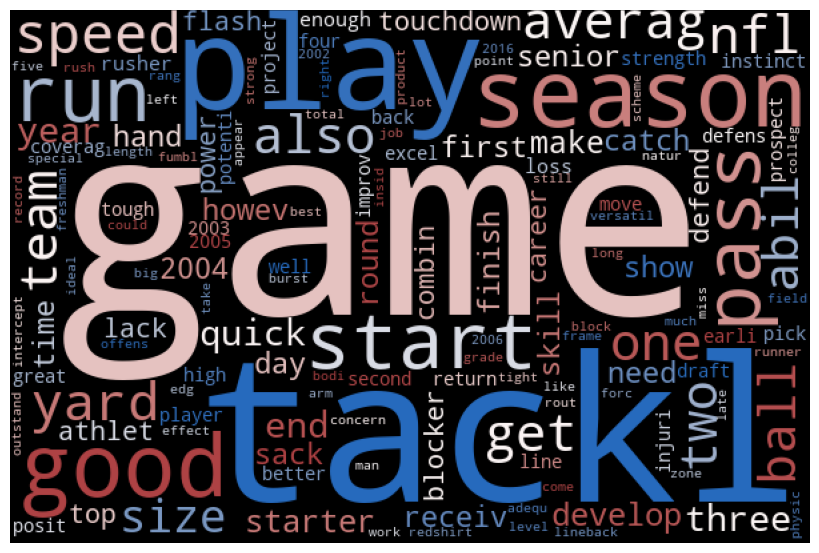

In [57]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(FreqDist(df.processed_report[df.Round == 3].explode()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

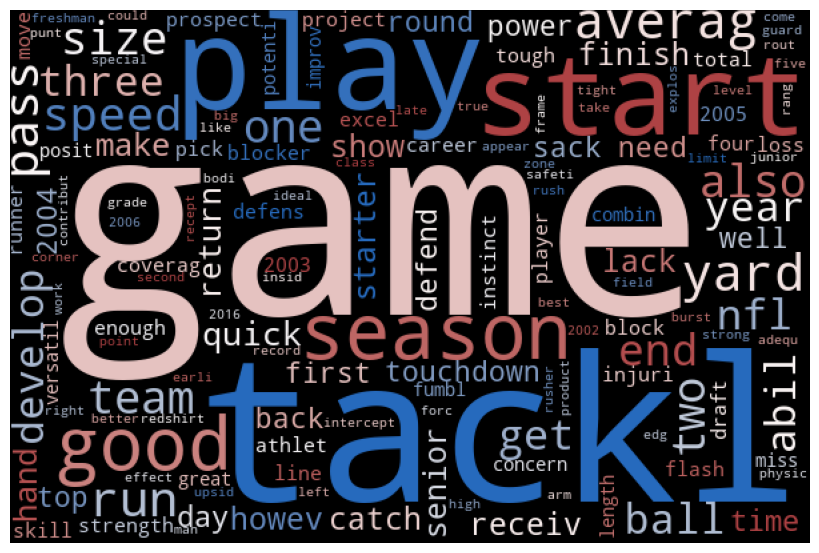

In [58]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(FreqDist(df.processed_report[df.Round == 4].explode()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

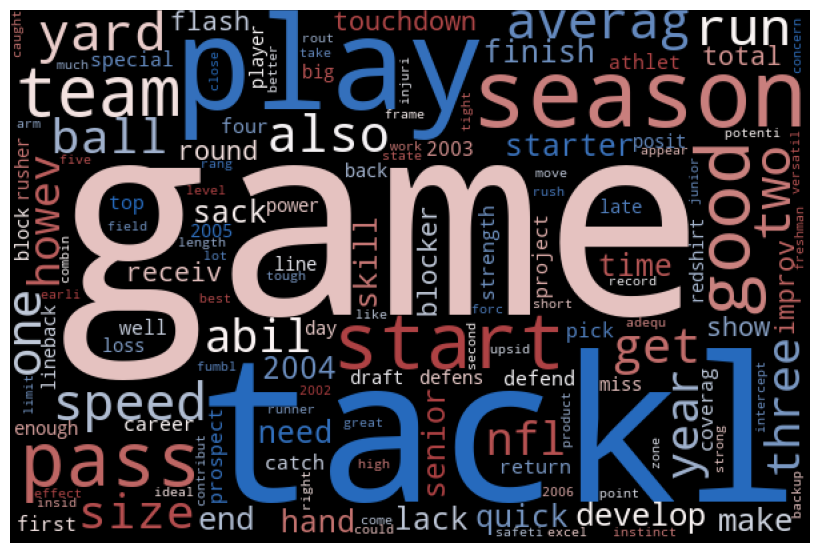

In [59]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(FreqDist(df.processed_report[df.Round == 5].explode()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

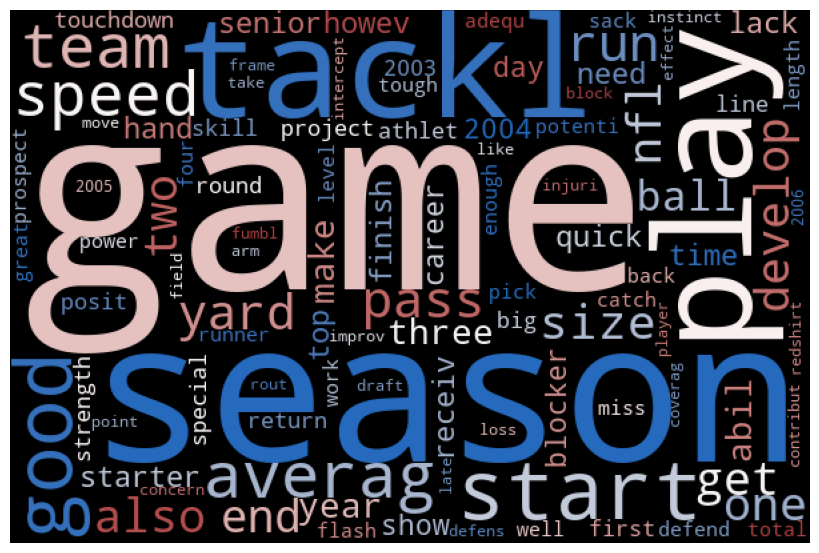

In [60]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(FreqDist(df.processed_report[df.Round == 6].explode()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [61]:
type(FreqDist(df.processed_report[df.Round == 7].explode()))

nltk.probability.FreqDist

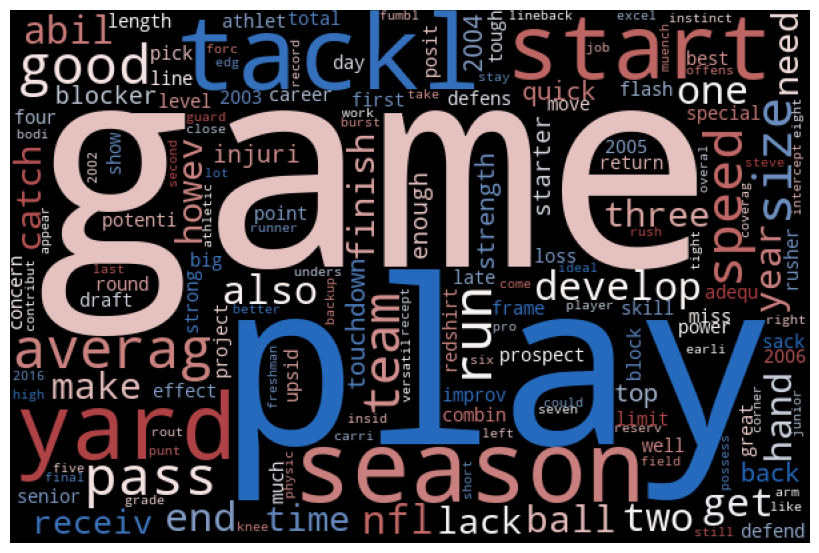

In [62]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(FreqDist(df.processed_report[df.Round == 7].explode()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [63]:
df.Round.value_counts(normalize=True)

6    0.155856
4    0.155381
3    0.151818
5    0.147066
2    0.136137
1    0.134236
7    0.119506
Name: Round, dtype: Float64

In [64]:
df.groupby('Round').grade.mean()

Round
1    90.875940
2    81.421442
3    69.742424
4    62.072250
5    53.386643
6    47.157454
7    43.216092
Name: grade, dtype: float64

In [65]:
df

,player,report,year,weight,height,pos_rk,ovr_rk,grade,age,Round,Pick,target,processed_report,reportlen,joined_report,pos
0,Alex Smith,Nephew of Michigan State head coach John L. Sm...,2005.0,217.0,76.125,2.0,3.0,98.0,21.0,1,1,3,"[nephew, michigan, state, head, coach, john, s...",173,nephew michigan state head coach john smith al...,QB
2,Ronnie Brown,Brown has played second fiddle to Carnell Will...,2005.0,233.0,72.250,1.0,4.0,98.0,23.0,1,2,3,"[brown, play, second, fiddl, carnel, william, ...",106,brown play second fiddl carnel william through...,RB
3,Braylon Edwards,"Edwards' father, Stanley, played at Michigan a...",2005.0,211.0,74.875,1.0,1.0,99.0,22.0,1,3,3,"[edward, father, stanley, play, michigan, nfl,...",76,edward father stanley play michigan nfl oiler ...,WR
4,Cedric Benson,Benson was drafted by the Los Angeles Dodgers ...,2005.0,222.0,70.500,3.0,10.0,96.0,22.0,1,4,3,"[benson, draft, los, angel, dodger, 12th, roun...",111,benson draft los angel dodger 12th round high ...,RB
5,Carnell Williams,Williams started two games and played in nine ...,2005.0,217.0,70.875,2.0,6.0,97.0,NaN,1,5,3,"[william, start, two, game, play, nine, 2001, ...",170,william start two game play nine 2001 suffer b...,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,Jeff Gunter,Gunter is a versatile edge defender who lines ...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,252,0,"[gunter, versatil, edg, defend, line, two, thr...",42,gunter versatil edg defend line two three poin...,LB
5741,Trenton Gill,Gill has a strong leg. He led the ACC in punt ...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,255,0,"[gill, strong, leg, led, acc, punt, averag, pu...",21,gill strong leg led acc punt averag punt plus ...,P
5742,Jesse Luketa,Luketa is a relentless run-defender who has go...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,256,0,"[luketa, relentless, run, defend, good, shock,...",36,luketa relentless run defend good shock hand l...,LB
5743,Marquis Hayes,Hayes is a mauler who plays with good leverage...,2022.0,NaN,NaN,NaN,NaN,NaN,23.0,7,257,0,"[hay, mauler, play, good, leverag, effect, cli...",33,hay mauler play good leverag effect climb seco...,OL


In [66]:
reportlength = pd.DataFrame(df.groupby('target').reportlen.mean()).reset_index()

In [67]:
grade = pd.DataFrame(df.groupby('Round').grade.mean()).reset_index()

In [68]:
all_rounds = pd.DataFrame(df.groupby('Round').reportlen.mean()).reset_index()
all_rounds

,Round,reportlen
0,1,67.759292
1,2,61.434555
2,3,57.716745
3,4,54.204893
4,5,51.975767
5,6,46.705793
6,7,41.560636


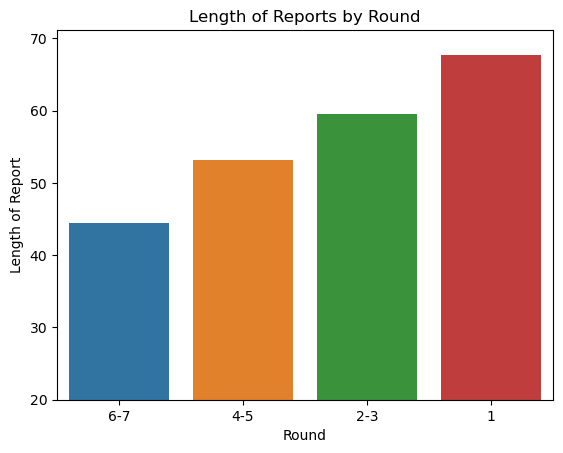

In [69]:
fig,ax = plt.subplots()
sns.barplot(x=reportlength.target,y=reportlength.reportlen)
ax.set_xticklabels(['6-7','4-5','2-3','1'])
ax.set_xlabel('Round')
ax.set_ylabel('Length of Report')
ax.set_title('Length of Reports by Round')
ax.set_ylim(bottom=20);

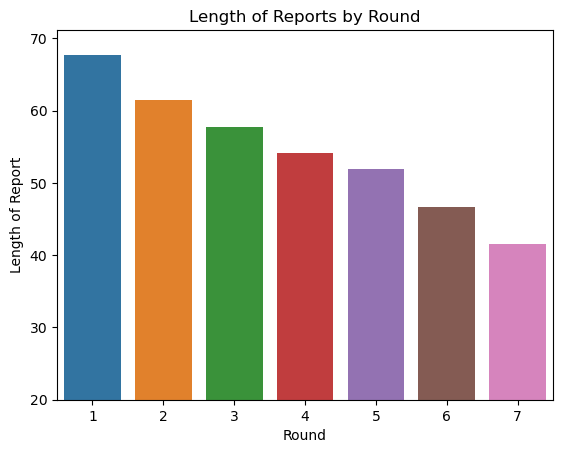

In [70]:
fig,ax = plt.subplots()
sns.barplot(x=all_rounds.Round,y=all_rounds.reportlen)
ax.set_xticklabels(['1','2','3','4','5','6','7'])
ax.set_xlabel('Round')
ax.set_ylabel('Length of Report')
ax.set_title('Length of Reports by Round')
ax.set_ylim(bottom=20);

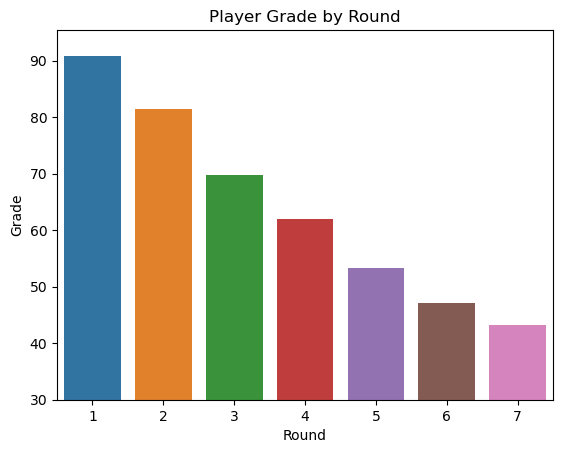

In [71]:
fig,ax = plt.subplots()
sns.barplot(x=grade.Round,y=grade.grade)
ax.set_xticklabels(['1','2','3','4','5','6','7'])
ax.set_xlabel('Round')
ax.set_ylabel('Grade')
ax.set_title('Player Grade by Round')
ax.set_ylim(bottom=30);